<a href="https://colab.research.google.com/github/mrm8488/shared_colab_notebooks/blob/master/custom_learningtopaint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ICCV2019-Learning to Paint

## [Arxiv](https://arxiv.org/abs/1903.04411) | [YouTube](https://youtu.be/YmOgKZ5oipk) | [Reddit](https://www.reddit.com/r/reinforcementlearning/comments/b5lpfl/learning_to_paint_with_modelbased_deep/)

## Abstract

We show how to teach machines to paint like human painters, who can use a
small number of strokes to create fantastic paintings. By employing a neural
renderer in model-based Deep Reinforcement Learning (DRL), our agents learn to
determine the position and color of each stroke and make long-term plans to
decompose texture-rich images into strokes. Experiments demonstrate that
excellent visual effects can be achieved using hundreds of strokes. The
training process does not require the experience of human painters or stroke
tracking data.

* Our ICCV poster
  <div>
<a target="_blank" rel="noopener noreferrer" href="https://github.com/hzwer/ICCV2019-LearningToPaint/blob/master/demo/lisa.gif"><img src="https://github.com/hzwer/ICCV2019-LearningToPaint/raw/master/demo/lisa.gif" alt="Demo" style="max-width:100%;"></a><a target="_blank" rel="noopener noreferrer" href="/hzwer/ICCV2019-LearningToPaint/blob/master/demo/sunrise.gif"><img src="https://github.com/hzwer/ICCV2019-LearningToPaint/raw/master/demo/sunrise.gif" alt="Demo" style="max-width:100%;"></a><a target="_blank" rel="noopener noreferrer" href="/hzwer/ICCV2019-LearningToPaint/blob/master/demo/sunflower.gif"><img src="https://github.com/hzwer/ICCV2019-LearningToPaint/raw/master/demo/sunflower.gif" alt="Demo" style="max-width:100%;"></a>
<a target="_blank" rel="noopener noreferrer" href="/hzwer/ICCV2019-LearningToPaint/blob/master/demo/palacemuseum.gif"><img src="https://github.com/hzwer/ICCV2019-LearningToPaint/raw/master/demo/palacemuseum.gif" alt="Demo" style="max-width:100%;"></a><a target="_blank" rel="noopener noreferrer" href="https://github.com/hzwer/ICCV2019-LearningToPaint/blob/master/demo/deepdream_night.gif"><img src="https://github.com/hzwer/ICCV2019-LearningToPaint/raw/master/demo/deepdream_night.gif" alt="Demo" style="max-width:100%;"></a><a target="_blank" rel="noopener noreferrer" href="/hzwer/ICCV2019-LearningToPaint/blob/master/demo/deepdream_bird.gif"><img src="https://github.com/hzwer/ICCV2019-LearningToPaint/raw/master/demo/deepdream_bird.gif" alt="Demo" style="max-width:100%;"></a>
</div>

>Colab customized by [mrm8488](https://twitter.com/mrm8488)

# 1. Clone the project

In [ ]:
!pip install imageio==2.4.1

In [1]:
!git clone https://github.com/hzwer/LearningToPaint.git

Cloning into 'LearningToPaint'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 429 (delta 12), reused 12 (delta 4), pack-reused 404
Receiving objects: 100% (429/429), 18.65 MiB | 24.77 MiB/s, done.
Resolving deltas: 100% (228/228), done.


In [2]:
cd LearningToPaint/

/content/LearningToPaint


In [0]:
!mkdir uploaded_images

# 2. Download the renderer and the actor

In [4]:
#@title Choose a stroke pattern (renderer/actor)

option = 'Default' #@param ["Default", "Triangle", "Round", "Bezierwotrans"]
print(option)

Default


In [5]:
urls = {
    "Default" : {"renderer": "https://drive.google.com/uc?export=download&id=1-7dVdjCIZIxh8hHJnGTK-RA1-jL1tor4", "actor": "https://drive.google.com/uc?export=download&id=1a3vpKgjCVXHON4P7wodqhCgCMPgg1KeR" },
		"Triangle" : {"renderer": "https://drive.google.com/uc?authuser=0&id=1YefdnTuKlvowCCo1zxHTwVJ2GlBme_eE&export=download", "actor": "https://drive.google.com/uc?authuser=0&id=1k8cgh3tF7hKFk-IOZrgsUwlTVE3CbcPF&export=download" },
		"Round" : {"renderer": "https://drive.google.com/uc?authuser=0&id=1kI4yXQ7IrNTfjFs2VL7IBBL_JJwkW6rl&export=download", "actor": "https://drive.google.com/uc?authuser=0&id=1ewDErUhPeGsEcH8E5a2QAcUBECeaUTZe&export=download" },
		"Bezierwotrans" : {"renderer": "https://drive.google.com/uc?authuser=0&id=1XUdti00mPRh1-1iU66Uqg4qyMKk4OL19&export=download", "actor": "https://drive.google.com/uc?authuser=0&id=1VBtesw2rHmYu2AeJ22XvTCuzuqkY8hZh&export=download" }
}

renderer_url = urls[option]["renderer"]
print(renderer_url)
actor_url = urls[option]["actor"]
print(actor_url)

https://drive.google.com/uc?export=download&id=1-7dVdjCIZIxh8hHJnGTK-RA1-jL1tor4
https://drive.google.com/uc?export=download&id=1a3vpKgjCVXHON4P7wodqhCgCMPgg1KeR


In [6]:
!wget "$renderer_url" -O renderer.pkl

--2019-12-17 18:30:48--  https://drive.google.com/uc?export=download&id=1-7dVdjCIZIxh8hHJnGTK-RA1-jL1tor4
Resolving drive.google.com (drive.google.com)... 74.125.142.138, 74.125.142.113, 74.125.142.139, ...
Connecting to drive.google.com (drive.google.com)|74.125.142.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0o-58-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ugmlao9psg9b3bcg0478n61riovim68r/1576605600000/10102393604162075786/*/1-7dVdjCIZIxh8hHJnGTK-RA1-jL1tor4?e=download [following]
--2019-12-17 18:30:50--  https://doc-0o-58-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ugmlao9psg9b3bcg0478n61riovim68r/1576605600000/10102393604162075786/*/1-7dVdjCIZIxh8hHJnGTK-RA1-jL1tor4?e=download
Resolving doc-0o-58-docs.googleusercontent.com (doc-0o-58-docs.googleusercontent.com)... 74.125.20.132, 2607:f8b0:400e:c07::84
Connecting to doc-0o-58-docs.googleusercontent.com (doc-0o-

In [7]:
!wget "$actor_url" -O actor.pkl

--2019-12-17 18:30:55--  https://drive.google.com/uc?export=download&id=1a3vpKgjCVXHON4P7wodqhCgCMPgg1KeR
Resolving drive.google.com (drive.google.com)... 74.125.135.139, 74.125.135.138, 74.125.135.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.135.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-58-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/11o5ps544est3dmr83qipls6nlmqfmn1/1576605600000/10102393604162075786/*/1a3vpKgjCVXHON4P7wodqhCgCMPgg1KeR?e=download [following]
--2019-12-17 18:30:58--  https://doc-0c-58-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/11o5ps544est3dmr83qipls6nlmqfmn1/1576605600000/10102393604162075786/*/1a3vpKgjCVXHON4P7wodqhCgCMPgg1KeR?e=download
Resolving doc-0c-58-docs.googleusercontent.com (doc-0c-58-docs.googleusercontent.com)... 74.125.20.132, 2607:f8b0:400e:c07::84
Connecting to doc-0c-58-docs.googleusercontent.com (doc-0c-

In [0]:
from google.colab import files

<a id='start'></a>

# 3. Remove existing files and upload ours one

In [0]:
!rm -rf ./output/*
![ -e video.mp4 ] && rm video.mp4

In [10]:
uploaded = files.upload()
pic_name = list(uploaded.keys())[0]
print(pic_name)
!mv ./$pic_name ./uploaded_images/$pic_name

Saving doublestrike.jpg to doublestrike.jpg
doublestrike.jpg


# 4. Create the painting's strokes
PS: It can take a while

In [11]:
!python3 baseline/test.py --max_step=80 --actor=actor.pkl --renderer=renderer.pkl --img=uploaded_images/$pic_name --divide=5

canvas step 0, L2Loss = 0.014524209313094616
canvas step 1, L2Loss = 0.00900501012802124
canvas step 2, L2Loss = 0.007474315818399191
canvas step 3, L2Loss = 0.006518863141536713
canvas step 4, L2Loss = 0.006097346544265747
canvas step 5, L2Loss = 0.005857930984348059
canvas step 6, L2Loss = 0.005611182656139135
canvas step 7, L2Loss = 0.005410532932728529
canvas step 8, L2Loss = 0.005220701452344656
canvas step 9, L2Loss = 0.0050310539081692696
canvas step 10, L2Loss = 0.004920271225273609
canvas step 11, L2Loss = 0.004844176582992077
canvas step 12, L2Loss = 0.004775298293679953
canvas step 13, L2Loss = 0.004634004086256027
canvas step 14, L2Loss = 0.004510152153670788
canvas step 15, L2Loss = 0.00442583579570055
canvas step 16, L2Loss = 0.0043609896674752235
canvas step 17, L2Loss = 0.004272724501788616
canvas step 18, L2Loss = 0.00420552771538496
canvas step 19, L2Loss = 0.004126628395169973
canvas step 20, L2Loss = 0.004087007138878107
canvas step 21, L2Loss = 0.004040814936161041

# 5. Convert it to video

In [12]:
!ffmpeg -r 30 -f image2 -i output/generated%d.png -s 512x512 -c:v libx264 -pix_fmt yuv420p video.mp4 -q:v 0 -q:a 0

ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --ena

# 6. Watch the video generated

In [13]:
from IPython.display import display, Image
import moviepy.editor as mpy
display(mpy.ipython_display('video.mp4', height=256, max_duration=100.))

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)3334144/45929032 bytes (7.3%)7675904/45929032 bytes (16.7%)11927552/45929032 bytes (26.0%)16162816/45929032 bytes (35.2%)20496384/45929032 bytes (44.6%)24838144/45929032 bytes (54.1%)29220864/45929032 bytes (63.6%)33480704/45929032 bytes (72.9%)37765120/45929032 bytes (82.2%)42049536/45929032 bytes (91.6%)45929032/45929032 bytes (100.0%)
  Done
File saved as /root/.imageio/ffmpeg/ffmpeg-linux64-v3.3.1.


# 6.b. Watch the final picture

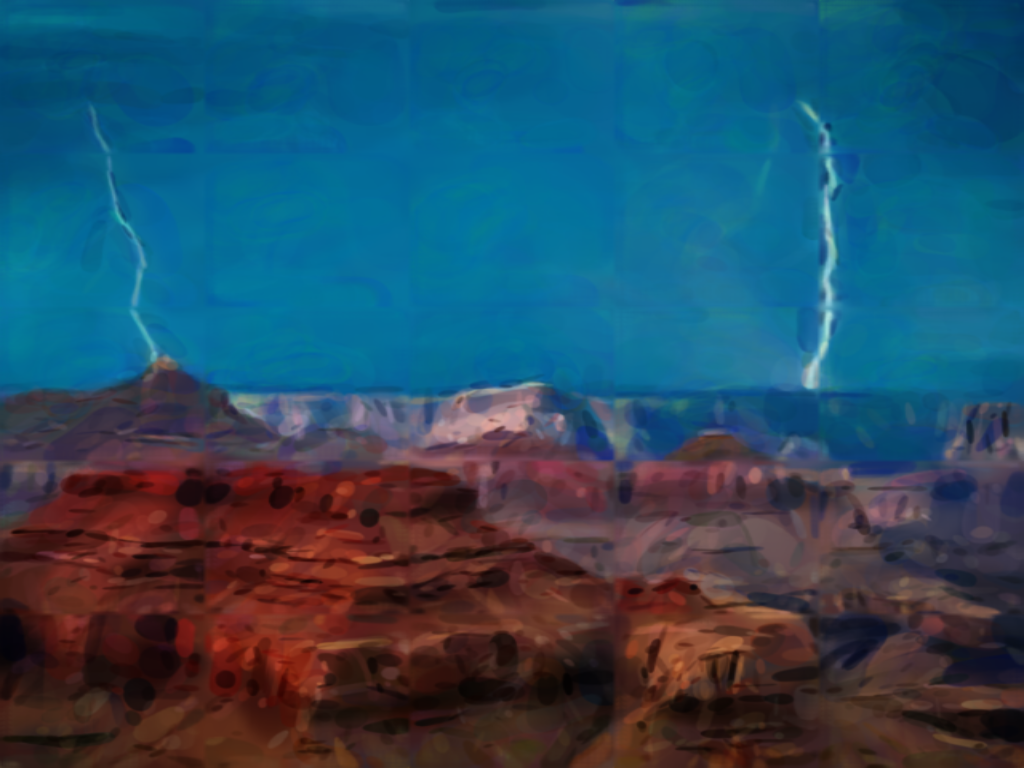

In [14]:
display(Image('output/generated399.png'))

# 7. Download it!

In [0]:
files.download("./video.mp4")

In [0]:
files.download("output/generated399.png")

### If you want to try with another picture go to step 3 or if you wanna try with another stroke pattern (round, triangle, etc) start from step 2

 Did you enjoy? Buy me a coffe :)
 
[![ko-fi](https://www.ko-fi.com/img/githubbutton_sm.svg)](https://ko-fi.com/Y8Y3VYYE)